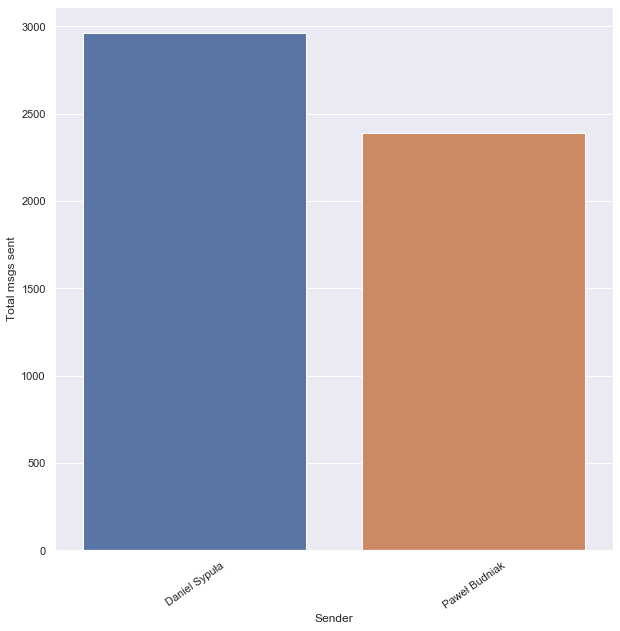

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import stats
import pandas as pd
import seaborn as sns

json_chat = R'data\skladczarnuchow.json'


#chat = stats.load_json(json_chat)
chat = stats.load_from_path(R'D:\facebook html i json\facebook-json\DanielSypula_cJS-IpkT2A', 'json')
msg_stats = stats.get_msg_stats(chat)
df = pd.DataFrame(((k,*v) for k,v in msg_stats.items()))
df.columns = ['Sender', 'Total msgs sent', 'Avg msg length', 'Total chars sent']
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.barplot(x='Sender', y='Total msgs sent', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation =35)
ax

## Znaki wysłane razem

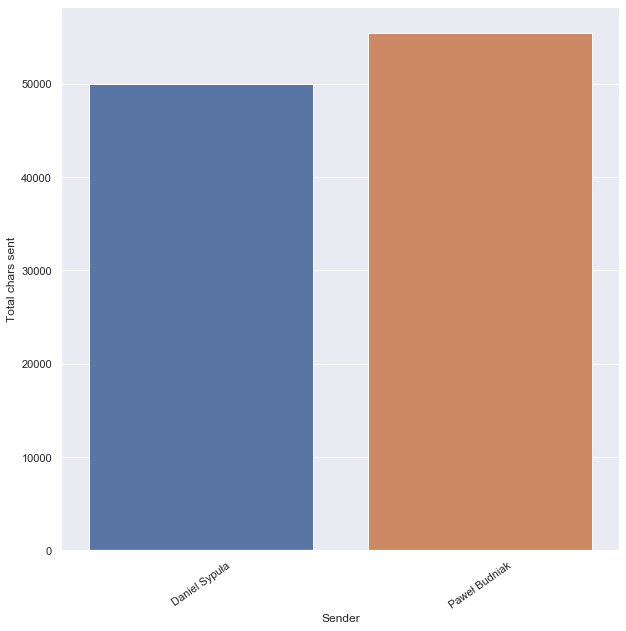

,Sender,Total msgs sent,Avg msg length,Total chars sent
0,Daniel Sypuła,2964,16.866059,49991.0
1,Paweł Budniak,2391,23.211209,55498.0


In [7]:
bar = sns.barplot(x='Sender', y='Total chars sent', data = df)
bar.set_xticklabels(bar.get_xticklabels(), rotation =35)
plt.show()
df

## Znaki na wiadomość

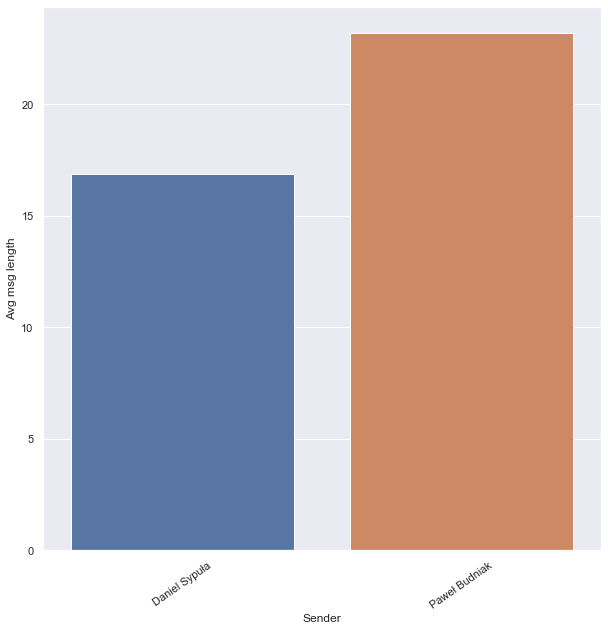

In [8]:
bar2 = sns.barplot(x='Sender', y='Avg msg length', data = df)
bar2.set_xticklabels(bar2.get_xticklabels(), rotation =35)
plt.show()

## Licznik wyrazów
Poniżej można zmienić minimalną długość słowa.

In [15]:
#ksywy = ['debesciak', 'pierdziano', 'czlowiek', 'wielkiego', 'szacunku', 'glawiator', 'tajtisów', 'klawy', 'ziom3q']

#### do zmiany
min_word_length = 5 #minimalna długość wyrazu
#### do zmiany 

word_counts = stats.get_word_counts(chat, filter_participants_names = True, exclude_words = None)
word_counts_filtered = {}
for sender in word_counts:
    word_counts_filtered[sender] = {k:v for k,v in word_counts[sender].items() if len(k)>=min_word_length}
#remove dictionaries emptied by the above filter:
word_counts_filtered = {k:v for k,v in word_counts_filtered.items() if v}

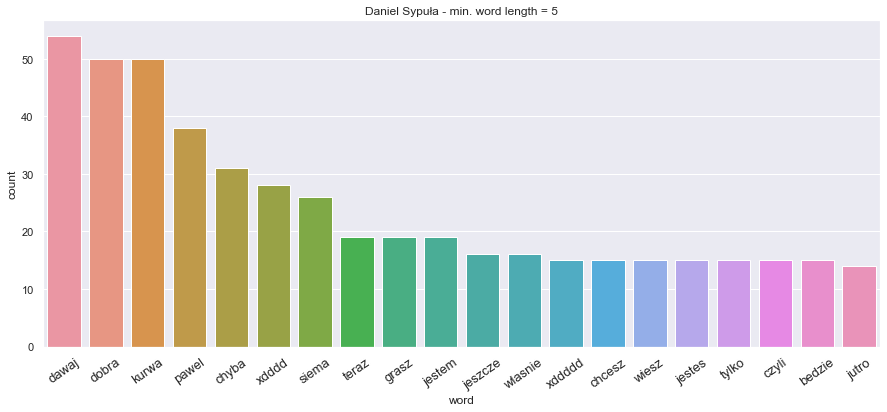

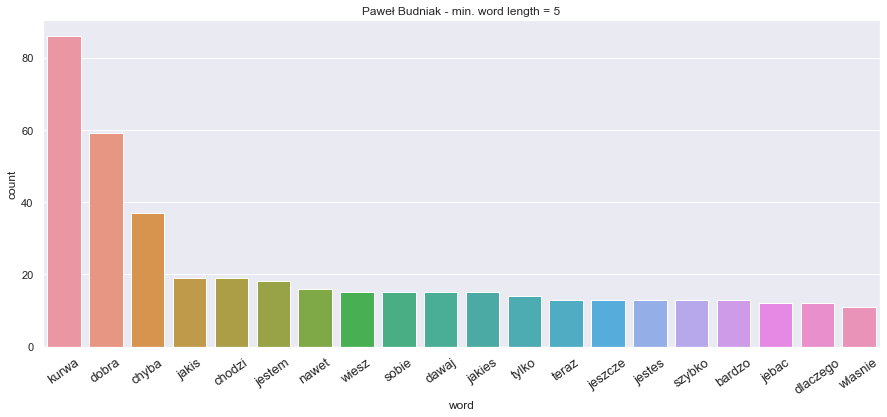

In [16]:
#plt.rcParams.update({'font.size': 30})
sns.set(rc={'figure.figsize':(15,6)})
plt.rc('xtick', labelsize=13)
for i,sender in enumerate(word_counts_filtered):
    df = pd.DataFrame(word_counts_filtered[sender].items())
    df.columns = ['word', 'count']
    plt.figure(i)
    ax = sns.barplot(y='count', x='word', data=df[0:20])
    ax.set_xticklabels(ax.get_xticklabels(), rotation =35)
    ax.set_title(f'{sender} - min. word length = {min_word_length}')


In [11]:
kurwas = stats.get_kurwa_coefficients(word_counts, msg_stats, odmiana = True)
#ignore_index = True w pandas 1.0.0
df = pd.DataFrame(kurwas.items(), columns = ['Sender', 'kurwas per msg']).sort_values(by='kurwas per msg', ascending=False)
df

,Sender,kurwas per msg
1,Paweł Budniak,4.1%
0,Daniel Sypuła,1.9%


In [12]:
kurwas = {sender: 0 for sender in word_counts}
for sender in word_counts:
    for word in word_counts[sender]:
        if 'kurw' in word or 'kurew' in word:
            kurwas[sender] += word_counts[sender][word]
print(kurwas)
new_coefs = {sender:"{:.1%}".format(kurwas[sender]/msg_stats[sender][0]) for sender in kurwas}
df = pd.DataFrame(new_coefs.items(), columns = ['Sender', 'kurwas per msg']).sort_values(by='kurwas per msg', ascending=False)
df.reset_index(drop = True, inplace = True)
df

{'Daniel Sypuła': 55, 'Paweł Budniak': 97}


,Sender,kurwas per msg
0,Paweł Budniak,4.1%
1,Daniel Sypuła,1.9%


In [13]:
pcoeffs = stats.get_profanity_coefficients(word_counts, msg_stats)
df = pd.DataFrame(pcoeffs.items(), columns = ['Sender', 'Msgs with profanity']).sort_values(by = 'Msgs with profanity', ascending = False)
df

,Sender,Msgs with profanity
1,Paweł Budniak,7.7%
0,Daniel Sypuła,4.7%


In [14]:
word_counts['Paweł Budniak']['something']

KeyError: 'something'

In [ ]:
pd.DataFrame(word_counts['Daniel Sypuła'].items())

In [ ]:
word_counts['Daniel Sypuła']['dzisiejszego']

In [ ]:
chat.keys()